### Exploratory Data Analysis (EDA) - Wine Quality 

#### Objective
This notebook presents an Exploratory Data Analysis (EDA) of a dataset consisting of physicochemical properties and quality (sensory) data for Portuguese "vinho verde" white and red wines samples.

The objective is to analyze the data to identify correlations between variables before applying a machine learning model to predict wine quality based on physicochemical characteristics.

http://www3.dsi.uminho.pt/pcortez/wine/


#### Input Variables - Physicochemical analysis 

1. **Fixed Acidity**: The concentration of non-volatile acids, primarily tartaric, malic, and citric acids, contributing to the wine's tartness and stability.

2. **Volatile Acidity**: The amount of acetic acid and other volatile acids present, which can affect the aroma and spoil the wine if too high.

3. **Citric Acid**: A minor acid in wine that can add freshness and enhance the fruity flavors.

4. **Residual Sugar**: The sugar remaining after fermentation, influencing sweetness and body.

5. **Chlorides**: The chloride ion concentration, which can affect the taste and stability of the wine.

6. **Free Sulfur Dioxide**: The portion of sulfur dioxide that is not bound to other compounds, acting as an antimicrobial and antioxidant.

7. **Total Sulfur Dioxide**: The total amount of sulfur dioxide, both free and bound, used as a preservative.

8. **Density**: The mass per unit volume of the wine, related to the alcohol and sugar content.

9. **pH**: The measure of the acidity or basicity of the wine, affecting taste, color, and microbial stability.

10. **Sulphates**: Compounds that can contribute to wine stability and preservation, also influencing mouthfeel.

11. **Alcohol**: The ethanol content resulting from fermentation, affecting the wine's body, war
12. **Type**: Categorical, Red or White Wine.
#### Output Variable - Sensory data
12. **Quality**: A sensory-based score ranging from 0 to 10, reflecting the overall perceived quality of the wine based on taste, aroma, balanoverall enjoyment.mth, and preservation.

#### Data Analysis

In [3]:
# Import all necesaries libraries
!pip install pandas --user
!pip install seaborn --user
!pip install matplotlib --user
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install missingno --user
import missingno as msno



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ------------------------- ------------ 112.6/165.5 kB 3.2 MB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   --------------------------------------- 294.9/294.9 kB 19.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   --- ------------------------------------ 0.7/8.0 MB 15.3 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/8.0 MB 20.9 MB/s eta 0:00:01
   ------------ --------------------------- 2.5/8.0 MB 20.0 MB/s eta 0:00:01
   ----------------- ---------------------- 3.4/8.0 MB 19.8 MB/s eta 0:00:01
   ----------------------- ---------------- 4.6/8.0 MB 20.9 MB/s eta 0:00:01
   ----------------------------- ---------- 5.8/8.0 MB 21.9 MB/s eta 0:00:01
   ----------------------------------- ---- 7.2/8.0 MB 22.9 MB/s eta 0:00:01
   -----


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 463.5 kB/s eta 0:00:00
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
    --------------------------------------- 0.7/44.5 MB 15.5 MB/s eta 0:00:03
   - -------------------------------------- 2.0/44.5 MB 21.0 MB/s eta 0:00:03
   -- ------------------------------------- 3.2/44.5 MB 22.9 MB/s eta 0:00:02
   ---- ----------------------------------- 4.6/44.5 MB 24.6 MB/s eta 0:00:02
   ----- ---------------------------------- 5.9/44.5 MB 25.3 MB/s eta 0:00:02
   ------ --------------------------------- 7.3/44.5 MB 25.9 MB/s eta 0:00:02
   ------- ----------------------


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
df = pd.read_csv("WineQuality.csv")

In [41]:
# Show first rows of the DataFrame
df.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,White Wine
1,0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,White Wine
2,0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,White Wine
3,0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,White Wine
4,0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,White Wine


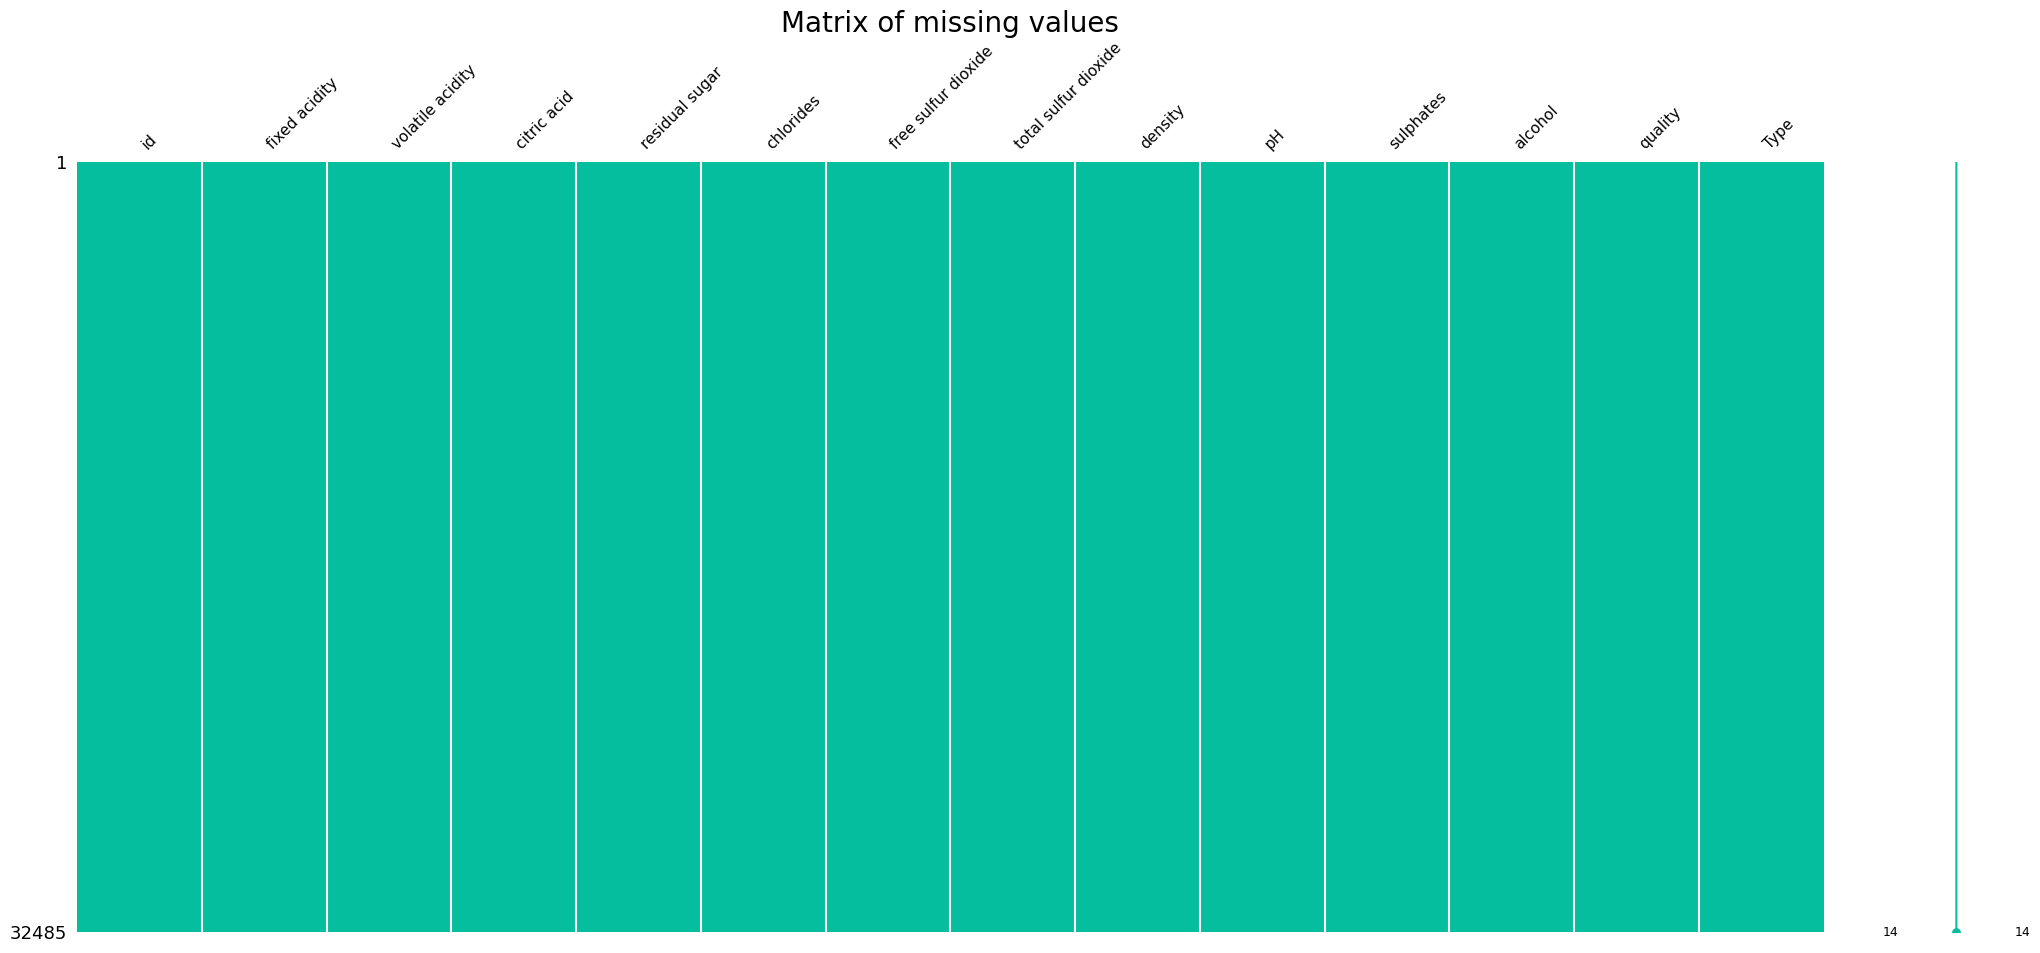

In [42]:
# Build a matrix of missing values
msno.matrix(df, fontsize=11, color=(0.0157, 0.749, 0.6157))  # Cambia el color aquí
plt.title('Matrix of missing values',fontsize=20)
plt.show()

There are no missing values on the DataSet

In [47]:
duplicates= df.duplicated()
num_duplicates = sum(duplicates)
print(f"Number of duplicated rows: {num_duplicates}")


Number of duplicated rows: 0


In [45]:
num_duplicates = df.shape[0] - df.drop_duplicates(keep='first').shape[0]
df = df.drop_duplicates()
print(f"Number of duplicate rows removed: {num_duplicates}")

Number of duplicate rows removed: 0


In [ ]:
# Deleting column id
del df["id"]

In [49]:
# Describe numerical variables
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,6449.0,3245.94,1874.71,0.00,1620.00,3244.00,4870.00,6496.00
fixed acidity,6449.0,7.21,1.30,3.80,6.40,7.00,7.70,15.90
volatile acidity,6449.0,0.34,0.16,0.08,0.23,0.29,0.40,1.58
citric acid,6449.0,0.32,0.15,0.00,0.25,0.31,0.39,1.66
residual sugar,6449.0,5.45,4.76,0.60,1.80,3.00,8.10,65.80
chlorides,6449.0,0.06,0.04,0.01,0.04,0.05,0.06,0.61
free sulfur dioxide,6449.0,30.53,17.77,1.00,17.00,29.00,41.00,289.00
total sulfur dioxide,6449.0,115.85,56.57,6.00,78.00,118.00,156.00,440.00
density,6449.0,0.99,0.00,0.99,0.99,0.99,1.00,1.04
pH,6449.0,3.22,0.16,2.72,3.11,3.21,3.32,4.01


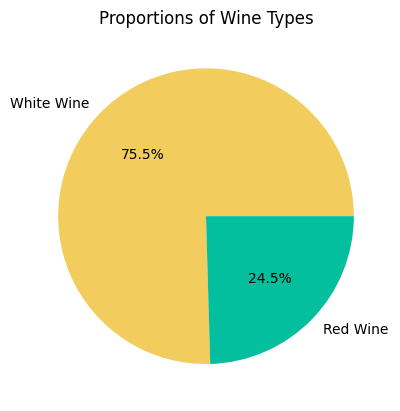

In [50]:
 # Describe categorical variables 
counts = df["Type"].value_counts()

colors = ['#F2CD5E','#04BF9D']
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Proportions of Wine Types')
plt.show()

Most samples on the dataset are from White wine

In [87]:
# Search for correalations between variables
df_continuous_vars = df.select_dtypes(include=[np.number])

# Correlacón de Pearson
corr_matrix = df_continuous_vars.corr().round(2)
corr_matrix


,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
id,1.00,-0.00,0.01,-0.01,-0.02,-0.00,-0.00,-0.01,-0.02,-0.01,-0.02,0.02,0.01
fixed acidity,-0.00,1.00,0.22,0.33,-0.11,0.30,-0.28,-0.33,0.46,-0.25,0.30,-0.10,-0.08
volatile acidity,0.01,0.22,1.00,-0.38,-0.20,0.38,-0.35,-0.41,0.27,0.26,0.23,-0.04,-0.27
citric acid,-0.01,0.33,-0.38,1.00,0.14,0.04,0.13,0.19,0.10,-0.33,0.06,-0.01,0.08
residual sugar,-0.02,-0.11,-0.20,0.14,1.00,-0.13,0.40,0.50,0.55,-0.27,-0.19,-0.36,-0.04
chlorides,-0.00,0.30,0.38,0.04,-0.13,1.00,-0.19,-0.28,0.36,0.04,0.40,-0.26,-0.20
free sulfur dioxide,-0.00,-0.28,-0.35,0.13,0.40,-0.19,1.00,0.72,0.03,-0.15,-0.19,-0.18,0.05
total sulfur dioxide,-0.01,-0.33,-0.41,0.19,0.50,-0.28,0.72,1.00,0.03,-0.24,-0.28,-0.27,-0.04
density,-0.02,0.46,0.27,0.10,0.55,0.36,0.03,0.03,1.00,0.01,0.26,-0.69,-0.30
pH,-0.01,-0.25,0.26,-0.33,-0.27,0.04,-0.15,-0.24,0.01,1.00,0.19,0.12,0.02


There is a low correlation between most of the variables, except for the following pairs:
- Free sulfur dioxide and total sulfur dioxide
- Alcohol and density
  
This is expected, as the dataframe includes both white and red wines, which differ significantly in their composition as it can be seen next.

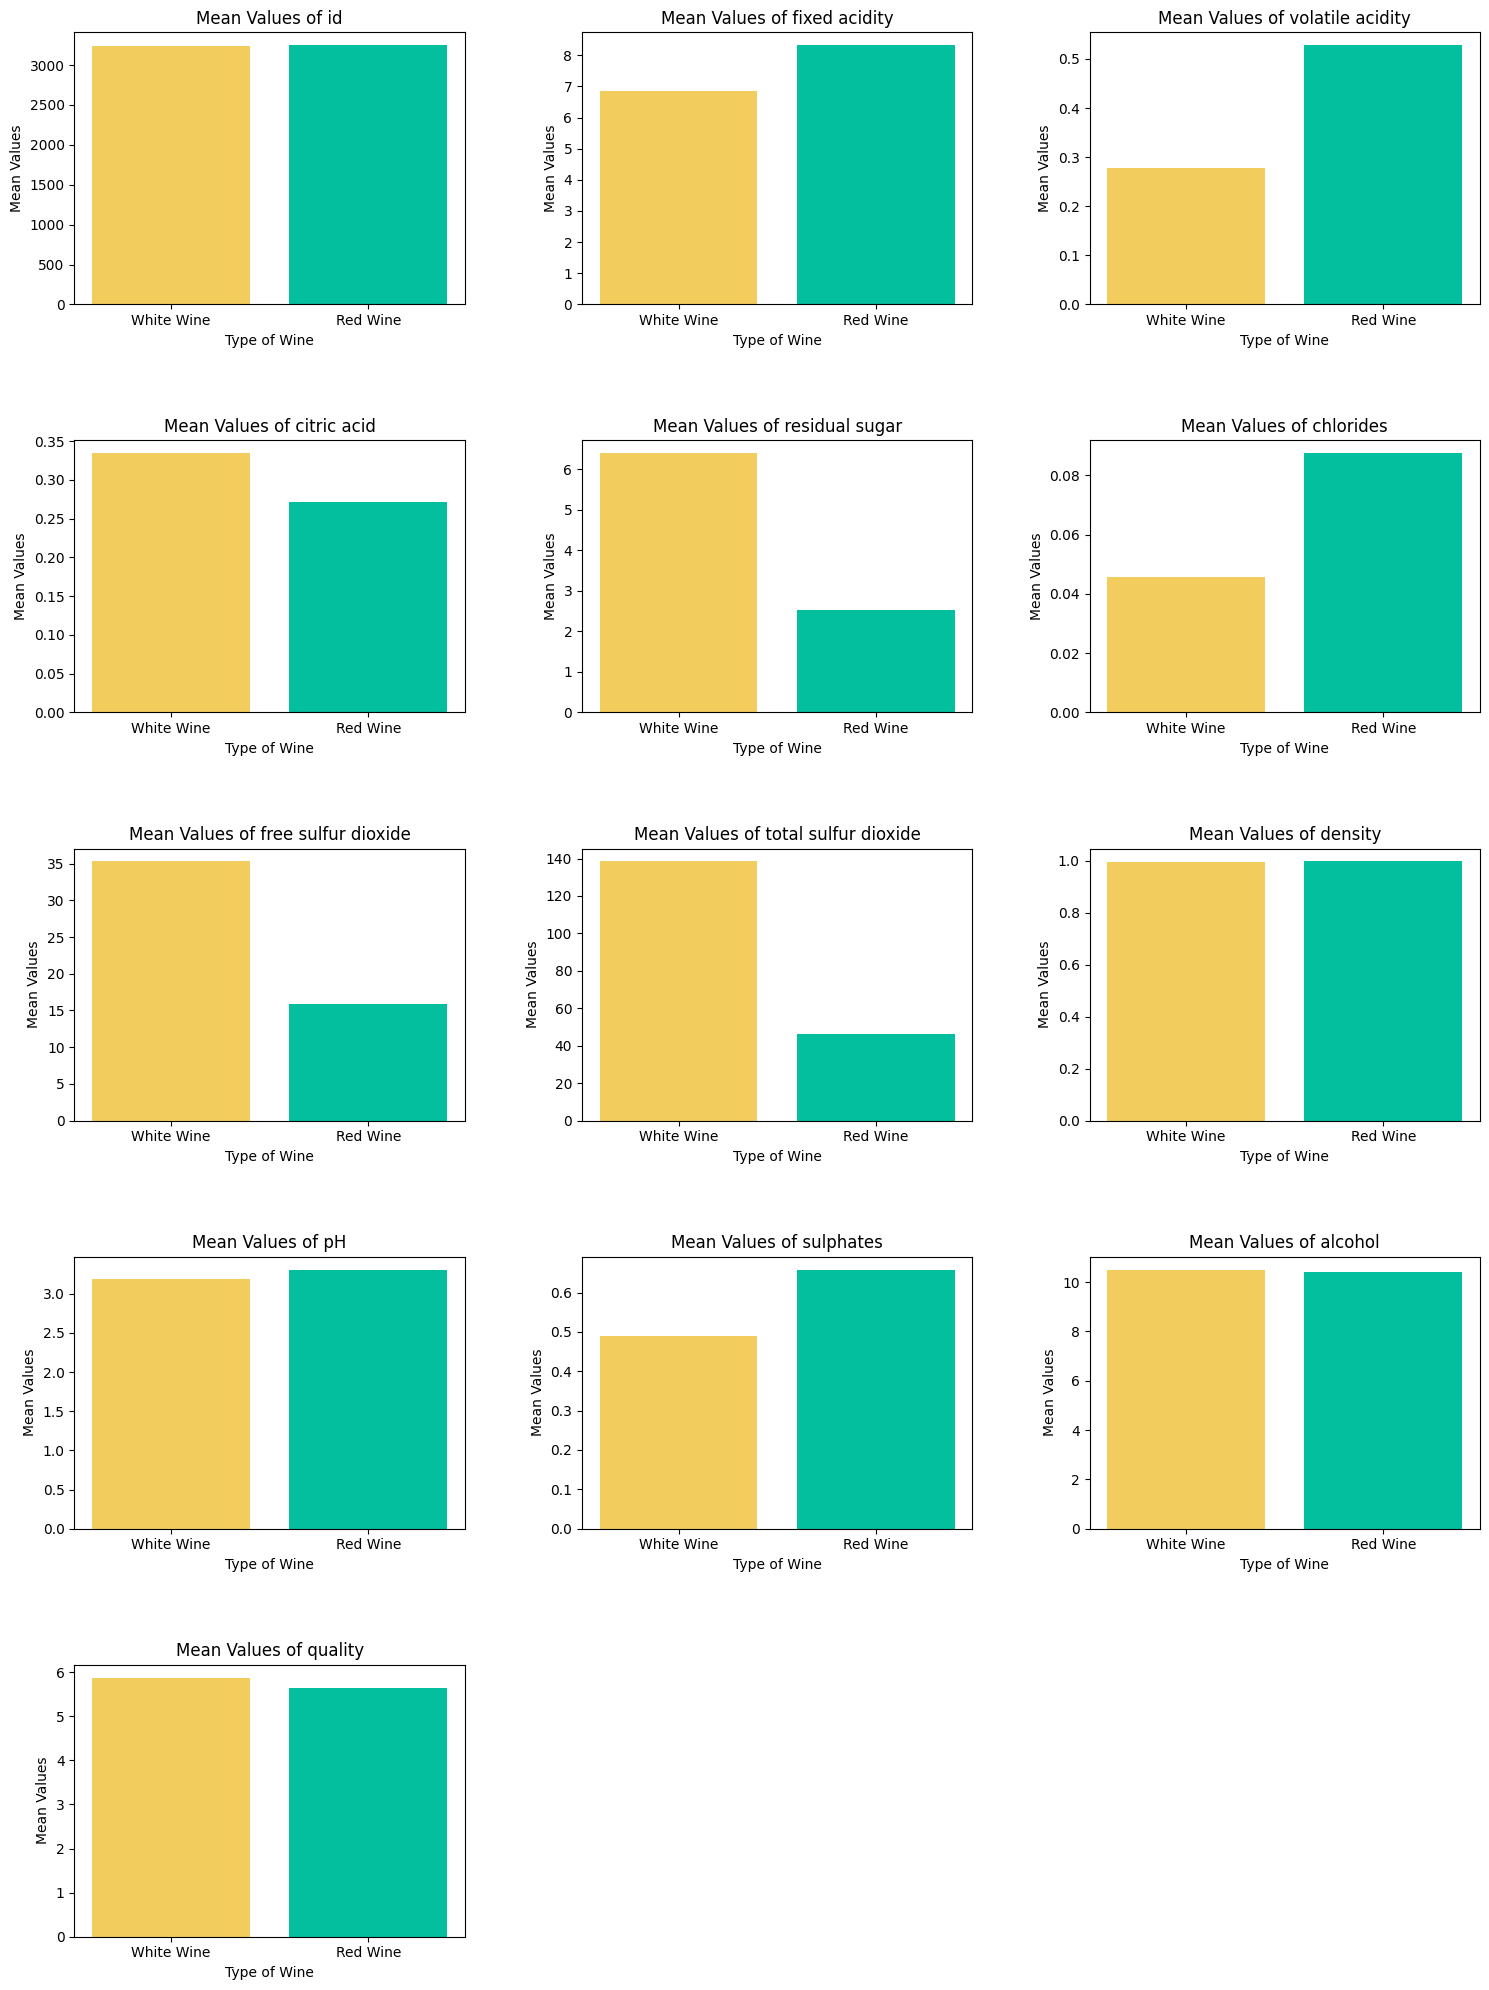

In [83]:
# Calcula el promedio de cada característica para cada tipo de vino
promedios_blancos = df[df['Type'] == 'White Wine'].select_dtypes(include=[int, float]).mean()
promedios_tintos = df[df['Type'] == 'Red Wine'].select_dtypes(include=[int, float]).mean()


# Definir los colores para cada tipo de vino
colors = ['#F2CD5E','#04BF9D']

# Crear una figura con una grilla de 3 columnas
fig, axs = plt.subplots(nrows=(len(promedios_blancos) + 2) // 3, ncols=3, figsize=(15, 20))

# Crear un gráfico por cada valor en la serie
for i, (name, val) in enumerate(promedios_blancos.items()):
    row = i // 3
    col_idx = i % 3
    axs[row, col_idx].bar(['White Wine', 'Red Wine'], [val, promedios_tintos[name]], color=[colors[0], colors[1]])
    axs[row, col_idx].set_xlabel('Type of Wine')
    axs[row, col_idx].set_ylabel('Mean Values')
    axs[row, col_idx].set_title(f'Mean Values of {name}')

# Ocultar los ejes vacíos
for ax in axs.flat:
    if not ax.has_data():
        ax.axis('off')

# Mostrar la grilla de gráficos
plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

Hay grandes diferencias en las características fisicoqímicas promedio entre los vinos tintos y blancos:


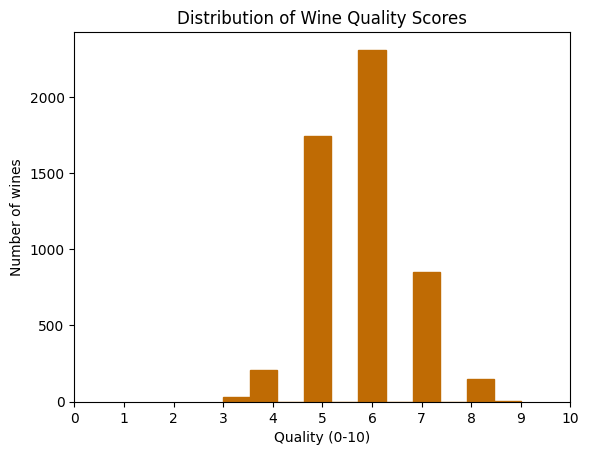

In [30]:
# Crear un histograma de la distribución de puntajes de calidad
plt.hist(df['quality'], bins=11, edgecolor='#BF6B04', facecolor='#BF6B04')
plt.xlabel('Quality (0-10)')
plt.ylabel('Number of wines')
plt.title('Distribution of Wine Quality Scores')
plt.xticks(range(11))  
plt.show()

Mostly of wines are arround a quality value of six

Se analizan los vinos por separado según Tintos o blancos

In [53]:
# DataSubset with White Wines
df_white = df[df["Type"] == "White Wine"]

In [55]:
df_white.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,4866.0,3245.23,1871.89,0.00,1626.50,3254.50,4855.25,6495.00
fixed acidity,4866.0,6.85,0.84,3.80,6.30,6.80,7.30,14.20
volatile acidity,4866.0,0.28,0.10,0.08,0.21,0.26,0.32,1.10
citric acid,4866.0,0.33,0.12,0.00,0.27,0.32,0.39,1.66
residual sugar,4866.0,6.39,5.07,0.60,1.70,5.20,9.90,65.80
chlorides,4866.0,0.05,0.02,0.01,0.04,0.04,0.05,0.35
free sulfur dioxide,4866.0,35.31,17.02,2.00,23.00,34.00,46.00,289.00
total sulfur dioxide,4866.0,138.45,42.51,9.00,108.00,134.00,167.00,440.00
density,4866.0,0.99,0.00,0.99,0.99,0.99,1.00,1.04
pH,4866.0,3.19,0.15,2.72,3.08,3.18,3.28,3.82
